# Data Analysis

Wir benutzen ein öffentlich zugängliches synthetischen Datenset von kaggle.

https://www.kaggle.com/code/ravivarmaodugu/insclaim-eda-modeling

## Importe

Im ersten Step importieren wir die Bibliotheken, die wir für unser Projekt brauchen.

In [1]:
## Import relevant libraries for data processing & visualisation

import numpy as np              # linear algebra
import pandas as pd             # data processing, dataset file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization & graphical plotting
import seaborn as sns           # to visualize random distributions
import plotly.express as px
from datetime import datetime

%matplotlib inline

import warnings                 # to deal with warning messages
warnings.filterwarnings('ignore')

C:\Users\f12973\AppData\Local\Temp\ipykernel_9372\1417646557.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd             # data processing, dataset file I/O (e.g. pd.read_csv)


## Read Data

Nun lesen wir unser Datenset ein. Wir arbeiten hier mit einem databricks Playground, das heißt wir haben keinen Zugriff auf gothaer Daten. Wir können jedoch Datensets von kaggle verwenden. Da databricks auf der python-basierten Programmiersprache PySpark basiert, funktioniert das Dateneinlesem hier etwas anders als es zum Beispiel mit pandas.read_csv() funktionieren würde. Mit spark.read.load() lesen wir unser Datenset ein. Die Funktion .toPandas() am Ende, wandelt unser Datenset direkt in einen DataFrame um, mit dem wir mit pandas arbeiten können.

In [2]:
df_insurance_ini = pd.read_csv("Scripts/data/insurance_data_kaggle_palooza.csv", sep=",")

## Explore Data

In diesem Teil werfen wir einen genaueren Blick auf die Daten. Das Ziel ist es einen Überblick über die Daten zu bekommen. Auch sehen wir, wo wir vielleicht Dinge anpassen und ändern müssen, damit wir sinnvoll mit den Daten arbeiten können.

Als erstes schauen wir uns den datensatz mit der head() oder tail() Funktion an.

In [3]:
# Datensatz anschauen
df_insurance_ini.head()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


Mit der columns() Funktion können wir sie Spaltennamen des Datensatzen einsehen. Diese werden als Liste ausgegeben.

In [4]:
# Welche Spalten hat der Datensatz
df_insurance_ini.columns

Index(['index', 'PatientID', 'age', 'gender', 'bmi', 'bloodpressure',
       'diabetic', 'children', 'smoker', 'region', 'claim'],
      dtype='object')

Mit shape können wir herausfinden, wie viele Zeilen und Spalten der Datensatz hat.

In [ ]:
# Anzahl der Reihen und Spalten prüfen
print("The number of rows and number of columns are ", df_insurance_ini.shape)

Ein wichtiger Step ist es, zu prüfen, ob es fehlende Werte im Datensatz gibt.

In [5]:
# Prüfen, ob es fehlende Werte im datensatz gibt
df_insurance_ini.isna().sum()

index            0
PatientID        0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

Lass uns nun überprüfen, was für datentypen für die einzelnen Spalten automatisch erkannt worden sind und ob diese passen.

In [6]:
# informationen über Spalten und deren Datentyp
df_insurance_ini.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1340 non-null   int64  
 1   PatientID      1340 non-null   int64  
 2   age            1335 non-null   float64
 3   gender         1340 non-null   object 
 4   bmi            1340 non-null   float64
 5   bloodpressure  1340 non-null   int64  
 6   diabetic       1340 non-null   object 
 7   children       1340 non-null   int64  
 8   smoker         1340 non-null   object 
 9   region         1337 non-null   object 
 10  claim          1340 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 115.3+ KB


Mit der describe() Funktion können wir uns ganz einfach die wichtigsten statistischen Werte für jede Spalte anschauen.

In [7]:
# Statistische Übersicht der Daten
df_insurance_ini.describe()

,index,PatientID,age,bmi,bloodpressure,children,claim
count,1340.000000,1340.000000,1335.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,669.500000,670.500000,38.078652,30.668955,94.157463,1.093284,13252.745642
std,386.968991,386.968991,11.102924,6.106735,11.434712,1.205334,12109.609288
min,0.000000,1.000000,18.000000,16.000000,80.000000,0.000000,1121.870000
25%,334.750000,335.750000,29.000000,26.275000,86.000000,0.000000,4719.685000
50%,669.500000,670.500000,38.000000,30.400000,92.000000,1.000000,9369.615000
75%,1004.250000,1005.250000,47.000000,34.700000,99.000000,2.000000,16604.305000
max,1339.000000,1340.000000,60.000000,53.100000,140.000000,5.000000,63770.430000


Zuetzt schauen wir uns an, welche eindeutigen Labels es in den kategorischen Spalten gibt.

In [18]:
## Checking the labels in categorical features
for col in df_insurance_ini.columns:
    if df_insurance_ini[col].dtype=='object':
        print()
        print(col)
        print(df_insurance_ini[col].unique())


gender
['male' 'female']

diabetic
['diabetic' 'non-diabetic']

smoker
['non-smoker' 'smoker']

region
['southeast' 'northwest' 'southwest' 'northeast']


## Data Wrangling

In diesem Teil bereiten wir die Daten vor. Das heißt wir entfernen fehlende Werte, bennen Spalten um, ändern unsere Labels und so weiter...

Lass uns zunächst die index Spalte entferenen. Diese wurde aufgrund des Datenimportes automatisch hinzugefügt, liefert uns aber keine Informationen. Wir benutzen die drop() Funktion.

In [10]:
# Entferne die index Spalte
df = df_insurance_ini.drop(columns="index")

Im nächsten Schritt entfernen wir alle Zeilen mit fehlenden Werten. Über die dropna() Funktion ist das möglich. Alternativ können auch alle fehlenden Werte durch einen gewünschten Wert ersetzt werden. Dazu können wir die fillna() Funktion nutzen. fillna(0) ersetzt alle fehlenden Werte durch 0.

In [11]:
# Entferne Reihen mit fehlenden Werten
df.dropna(inplace=True)

# Überprüfe noch einmal die shape und ob alle fehlenden Werte entfernt wurden
print(f"Shape of Data after removing missing values: {df.shape}\n")
df.isna().sum()

Shape of Data after removing missing values: (1332, 10)



PatientID        0
age              0
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           0
claim            0
dtype: int64

Lass uns die Spalte PatientID nur in id umbennen.

In [12]:
# Benenne die Spalte PatientID um in id
df.rename(columns={"PatientID": "id"}, inplace=True)

Wir können nicht nur Spaltennamen umbenennen, sondern auch die Labels innerhalb einer Spalte "umlabeln". Lass uns statt die Spalten diabetic und smoker eindeutig in diabetic/non_diabetic bzw smoker/non-smoker umbenennen.

In [13]:
# Relabel die Kategorien 'diabetic', 'smoker': statt yes zu diabetic und no zu non-diabetic etc
df['diabetic'] = df['diabetic'].replace({'Yes': 'diabetic', 'No': 'non-diabetic'})
df['smoker'] = df['smoker'].replace({'Yes': 'smoker', 'No': 'non-smoker'})

Über die info() Funktion haben wir gesehen, dass die Spalte age als Datentyp float erkannt wurde. Das sollte zwar kein Problem für uns darstellen, aber zur Übung wandeln wir den datentyp der Spalte um in ein integer.

In [19]:
# die Werte in der Spalte age sind vom type float. Ändere den Datentyp zu integer
df["age"] = df["age"].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1332 entries, 0 to 1339
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1332 non-null   int64  
 1   age            1332 non-null   int32  
 2   gender         1332 non-null   object 
 3   bmi            1332 non-null   float64
 4   bloodpressure  1332 non-null   int64  
 5   diabetic       1332 non-null   object 
 6   children       1332 non-null   int64  
 7   smoker         1332 non-null   object 
 8   region         1332 non-null   object 
 9   claim          1332 non-null   float64
dtypes: float64(2), int32(1), int64(3), object(4)
memory usage: 109.3+ KB


Lass uns nun einmal mit Datum arbeiten. Lass uns das Geburtsjahr anhand des Alters und des aktuellen Jahres berechnen.

In [22]:
# Use age column and calculate the birth year

# get current year
YEAR = datetime.now().year

# apply current year - age on df
df["YOB"] = df["age"].apply(lambda x: YEAR - x)

df.head()

,id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim,YOB
0,1,39,male,23.2,91,diabetic,0,non-smoker,southeast,1121.87,1985
1,2,24,male,30.1,87,non-diabetic,0,non-smoker,southeast,1131.51,2000
7,8,19,male,41.1,100,non-diabetic,0,non-smoker,northwest,1146.80,2005
8,9,20,male,43.0,86,non-diabetic,0,non-smoker,northwest,1149.40,2004
9,10,30,male,53.1,97,non-diabetic,0,non-smoker,northwest,1163.46,1994


Nun lass uns etwas fortgeschritteneres machen. Wir wollen anhand des Wertes für den BMI und den Blutdruck, eine Einordnung in Kategorien geben.

In [26]:
# Body Mass Index (BMI) Categories: Categories for BMI values:"underweight," "normal weight," "overweight," and "obese."

df['bmi_category'] = pd.cut(df['bmi'], bins=[0, 18.5, 24.9, 29.9, 100], labels=['underweight', 'normal weight', 'overweight', 'obese'])


# Display the first few rows of the dataset with the new "bmi_category" feature
print(df[['bmi', 'bmi_category']].head())

    bmi   bmi_category
0  23.2  normal weight
1  30.1          obese
7  41.1          obese
8  43.0          obese
9  53.1          obese


In [28]:
# Systolic blood pressure (bloodpressure) categories and their corresponding ranges
categories = {
    'Normal': (0, 120),
    'Elevated': (120, 130),
    'Hypertension Stage 1': (130, 140),
    'Hypertension Stage 2': (140, float('inf'))
}

# Function to categorize blood pressure values
def categorize_bp(bp):
    for category, (min_value, max_value) in categories.items():
        if min_value <= bp < max_value:
            return category
    return 'Unknown'

# Apply the categorization function to create the "bp_category" feature
df['bp_category'] = df['bloodpressure'].apply(categorize_bp)

# Display the first few rows of the dataset with the new "bp_category" feature
print(df[['bloodpressure', 'bp_category']].head())

   bloodpressure bp_category
0             91      Normal
1             87      Normal
7            100      Normal
8             86      Normal
9             97      Normal


## Gruppieren

In diesem Teil wollen wir das gruppieren von Datensätzen (ähnlich zu Pivot Tabellen in Excel ode GROUP BY Statement in SQL) üben.

Zunächst gruppieren wir nach der Region und finden heraus wie viele Frauen und Männer aus jeder Region kommen.

In [30]:
# Wie viele Frauen und Männer kommen jeweils aus welcher Region
df.groupby(["region", "gender"]).count()

# Was fällt auf? Bilde eine subgruppe
df.groupby(["region", "gender"]).count()["id"]
df.groupby(["region", "gender"]).agg({"gender": "count"})

region     gender
northeast  female    112
           male      119
northwest  female    164
           male      181
southeast  female    224
           male      218
southwest  female    162
           male      152
Name: id, dtype: int64

In [32]:
# Wie viele Männer und Frauen haben Diabetes?
df.groupby(["gender", "diabetic"]).agg({"gender": "count"})

gender
gender diabetic        
female No           339
       Yes          323
male   No           356
       Yes          314

In [31]:
# Wie viele Männer und Frauen, die Rauchen, haben auch Diabetes und aus welcher Region kommen sie?
df.groupby(["region", "gender", "smoker", "diabetic"]).agg({"gender": "count"})

gender
region    gender smoker     diabetic            
northeast female non-smoker diabetic          37
                            non-diabetic      46
                 smoker     diabetic          19
                            non-diabetic      10
          male   non-smoker diabetic          44
                            non-diabetic      37
                 smoker     diabetic          21
                            non-diabetic      17
northwest female non-smoker diabetic          62
                            non-diabetic      73
                 smoker     diabetic          12
                            non-diabetic      17
          male   non-smoker diabetic          65
                            non-diabetic      87
                 smoker     diabetic          16
                            non-diabetic      13
southeast female non-smoker diabetic          97
                            non-diabetic      91
                 smoker     diabetic          19
                            non-diabetic      17
          male   non-smoker diabetic          78
                            non-diabetic      85
                 smoker     diabetic          23
                            non-diabetic      32
southwest female non-smoker diabetic          67
                            non-diabetic      74
                 smoker     diabetic          10
                            non-diabetic      11
          male   non-smoker diabetic          51
                            non-diabetic      64
                 smoker     diabetic          16
                            non-diabetic      21

Nachdem wir nun Anzahlen betrachtet haben, wollen wir und nun die aggregate() Funktion kennenlernen mit der wir den Mittelwert, max/min Wert und vieles mehr berechnen können.

In [32]:
# Ermittle das Durchschnittsalter von Frauen und Männern je nach Region.
df.groupby(["region", "gender"]).agg({"age": "mean"})

age
region    gender           
northeast female  43.839286
          male    32.630252
northwest female  42.250000
          male    33.591160
southeast female  42.258929
          male    34.798165
southwest female  42.092593
          male    33.276316

In [33]:
# Ermittle den durchschnittlichen BMI von Frauen und Männern je nach Region.
df.groupby(["region", "gender"]).agg({"bmi": "mean"})

bmi
region    gender           
northeast female  29.680357
          male    29.064706
northwest female  29.277439
          male    29.134254
southeast female  31.767411
          male    33.023853
southwest female  30.060494
          male    31.541447

## Data Visualisation

### Automatisierte Datenreports

Dank einiger Python Bibliotheken haben wir die Möglichkeit, automatisierte Reports zu erstellen. Wir nutzen hier die Bibliothek ydata. https://docs.profiling.ydata.ai/latest/

In [ ]:
from ydata_profiling import ProfileReport

In [ ]:
ProfileReport(df.drop(columns=["index", "PatientID"]))

### Charts mit Plotly

So, endlich machen wir Plots! Juhu!

Wir nutzen zuerst die Bibliothek pltly express, da sie eine einfache Syntax hat. https://plotly.com/python/plotly-express/

#### Histogramme
Zunächst machen wir einfache Histogramme/Barcharts.

Die Anzahl der Kunden pro Region
Anzahl an Kunden nach Region und Geschlecht
Wir fangen mit einem simplen Chart an und überlegen dann gemeinsam, wie wir das Chart schöner machen können.

Abschließend werden wir eines der Charts mit einer anderen Bibliothek bauen und zwar mit seaborn. https://seaborn.pydata.org/index.html

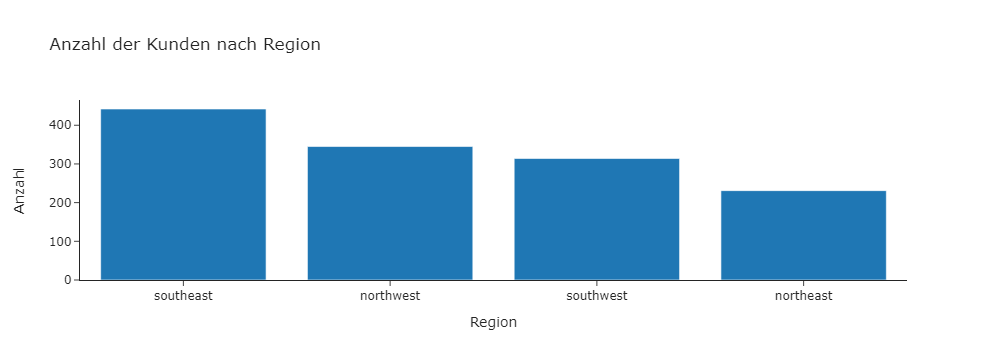

In [67]:
# Anzahl an Kunden nach Region
# TODO Plot schön machen
fig = px.histogram(df, x='region', 
                   labels={"region": "Region"}, 
                   title="Anzahl der Kunden nach Region",
                   template="simple_white"
                  )
fig.update_layout(yaxis_title="Anzahl") 
fig.show()

# Mögliche templates: ["plotly", "plotly_white", "plotly_dark", "ggplot2", "seaborn", "simple_white", "none"]
# siehe https://plotly.com/python/templates/

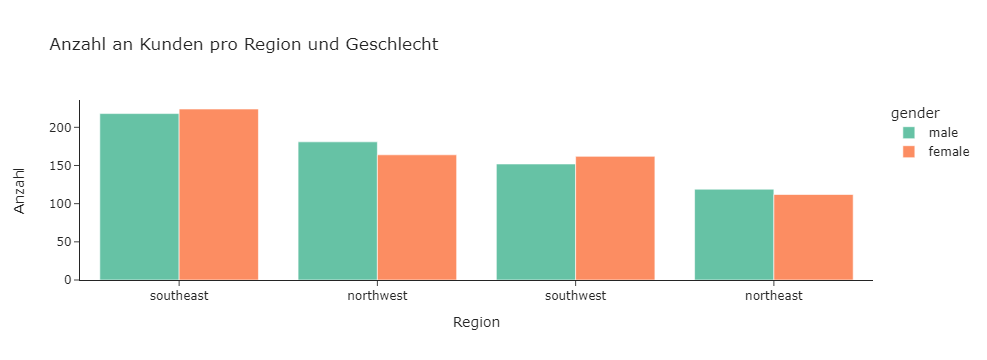

In [82]:
# Anzahl an Kunden nach Region und Geschlecht (plotly explress)
fig = px.histogram(df, x='region', color="gender", barmode="group", 
                   title = "Anzahl an Kunden pro Region und Geschlecht",
                   labels = {"region": "Region", "count": "Anzahl"},
                   color_discrete_sequence=px.colors.qualitative.Set2,
                  template="simple_white")
fig.update_layout(yaxis_title="Anzahl") 
fig.show()

# Farbschema: https://plotly.com/python/discrete-color/

[Text(0.5, 1.0, 'Anzahl an Kunden pro Region und Geschlecht'),
 Text(0.5, 0, 'Region'),
 Text(0, 0.5, 'Anzahl')]

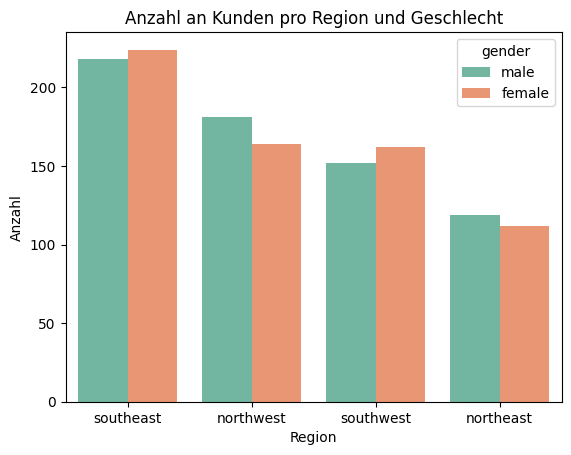

In [87]:
# Anzahl an Kunden nach Region und Geschlecht (seaborn)
sns.countplot(x='region', hue='gender', 
              palette="Set2", 
              data=df).set(title='Anzahl an Kunden pro Region und Geschlecht', xlabel='Region', ylabel='Anzahl')
#plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

#### Boxplots
Nun machen wir verschiedene Boxplots

Alter nach Geschlecht. Optional farbliche Unterteilung nach Raucher
Alter nach Claim, Region und Geschlecht
Histogramme für numerische Spalten: Hier nutzen wir Loops um für alle numerischen Spalten automatisiert Histogramme zu erstellen.
Abschließend schauen wir uns noch einmal an wie ein Boxplot mit seaborn erstellt werden kann.

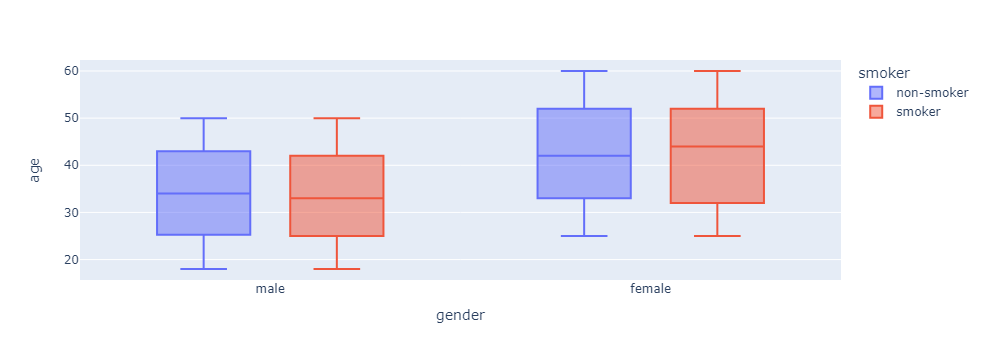

In [38]:
# Boxplot: Alter nach Geschlecht. Optional farbliche Unterteilung nach Raucher (plotly express)
fig = px.box(df, x="gender", y="age", color="smoker")
fig.show()

[Text(0.5, 1.0, 'Number of Insurance Claimants by Gender, by Age')]

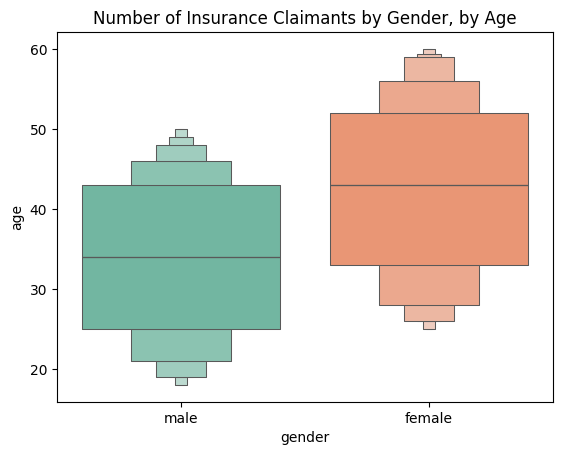

In [40]:
# Boxplot: Alter nach Geschlecht. Optional farbliche Unterteilung nach Raucher (seaborn)
sns.boxenplot(x='gender', y='age', palette="Set2", data=df).set(title='Number of Insurance Claimants by Gender, by Age')

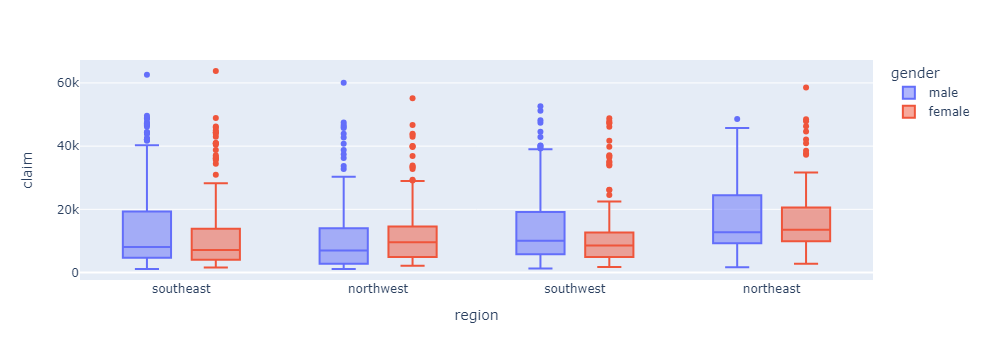

In [41]:
# Boxplot: Alter nach Claim, Region und Geschlecht
fig = px.box(df, x="region", y="claim", color="gender")
fig.show()

#### Histogramme

Nun lass uns für jede numerische Spalte die Verteilung in Form eines Histogrammes darstellen.

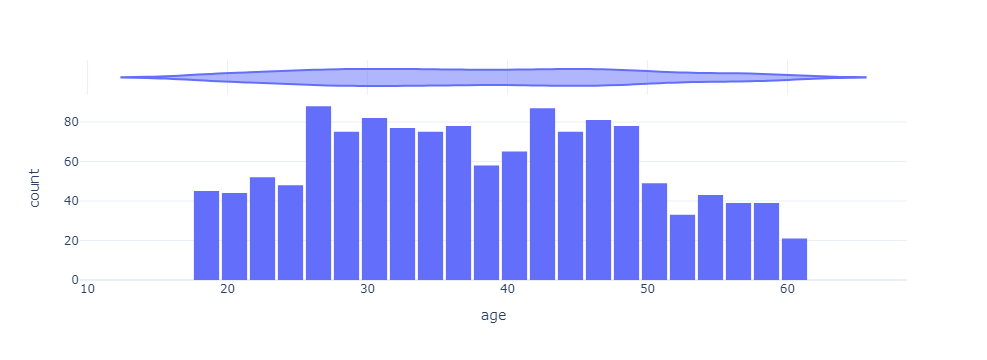

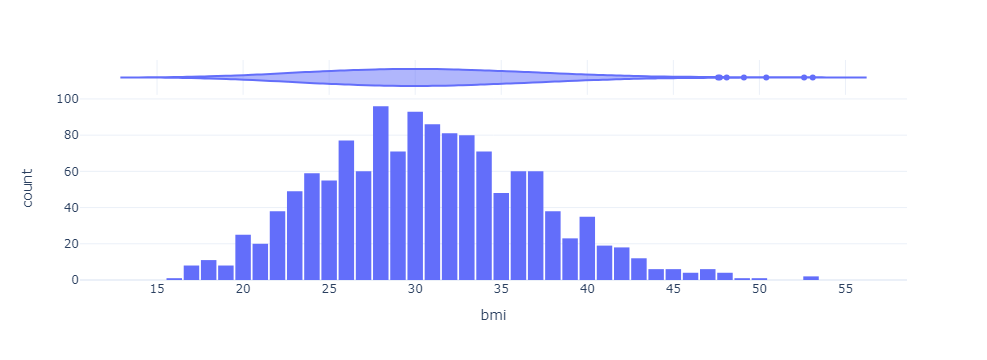

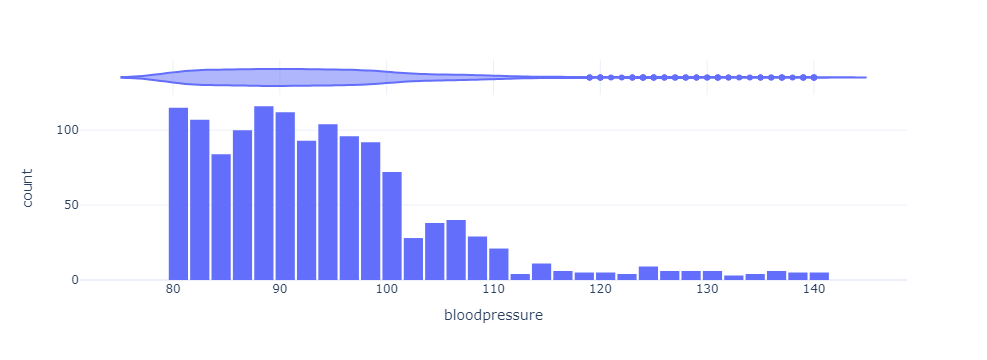

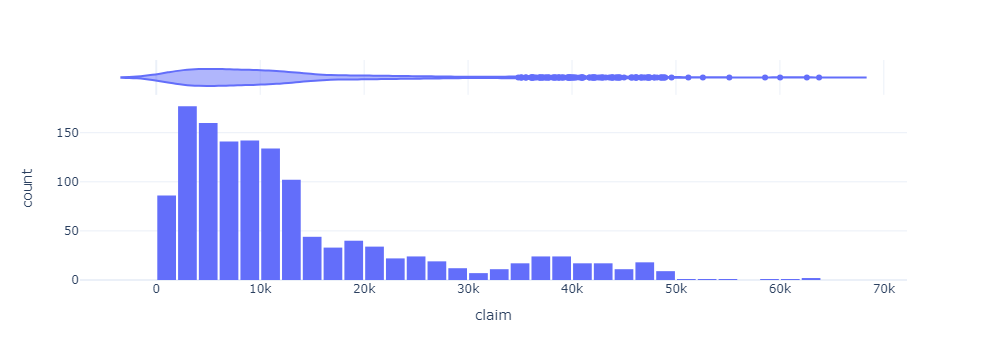

In [81]:
# Histogramme für numerische Spalten

numerical_columns=["age", "bmi", "bloodpressure", "claim"]

for col in numerical_columns:
  fig = px.histogram(df, x=col, marginal="violin", template="plotly_white")
  fig.update_layout(bargap=0.1)
  fig.show()

# marginal can be "box", "violin" or "rug"

#### Histogramme
Nun lass uns für jede numerische Spalte die Verteilung in Form eines Histogrammes darstellen.

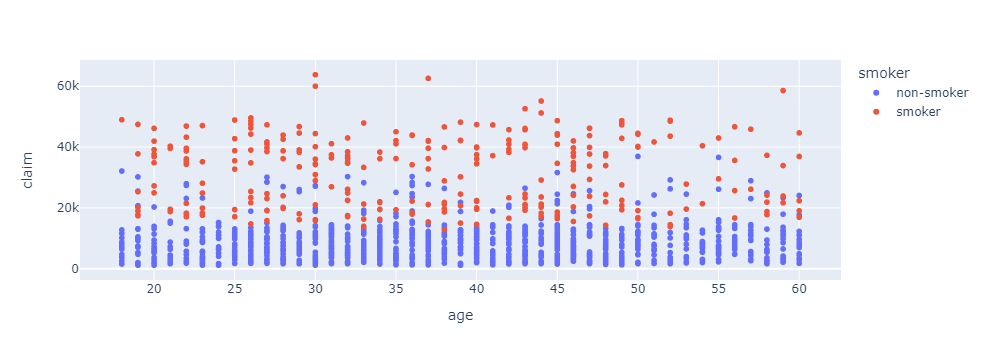

In [42]:
# Scatterplot: claim vs. age nach smoker
fig = px.scatter(df, x="age", y="claim", color="smoker")
fig.show()

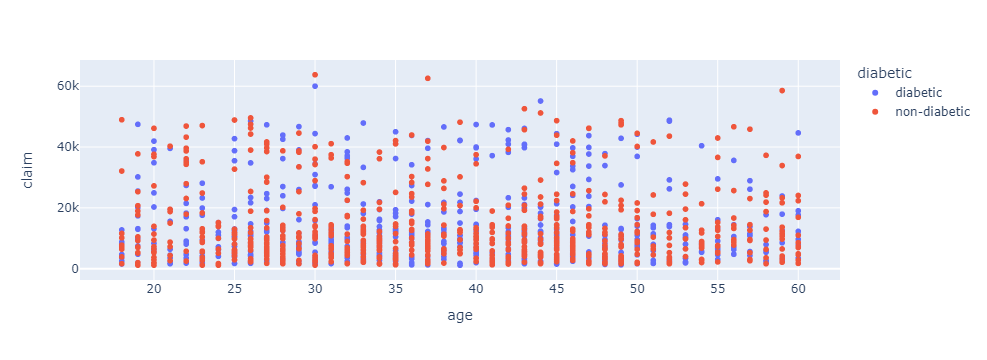

In [45]:
# Scatterplot: claim vs. age nach diabetic
fig = px.scatter(df, x="age", y="claim", color="diabetic")
fig.show()

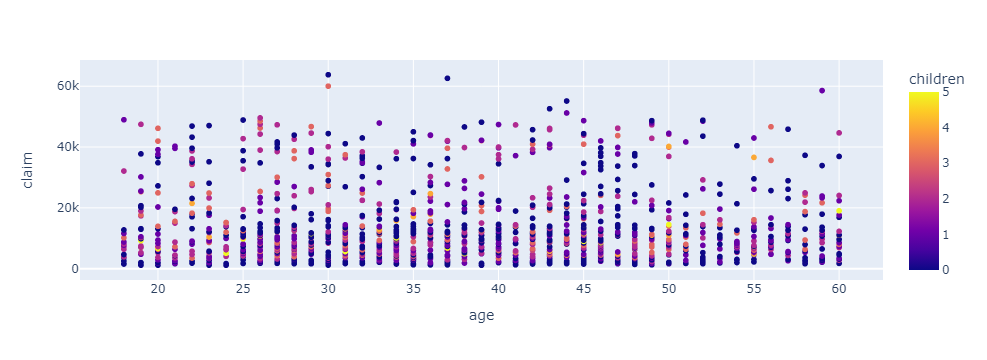

In [49]:
# Scatterplot: claim vs. age nach Anzahl Kinder
fig = px.scatter(df, x="age", y="claim", color="children")
fig.show()

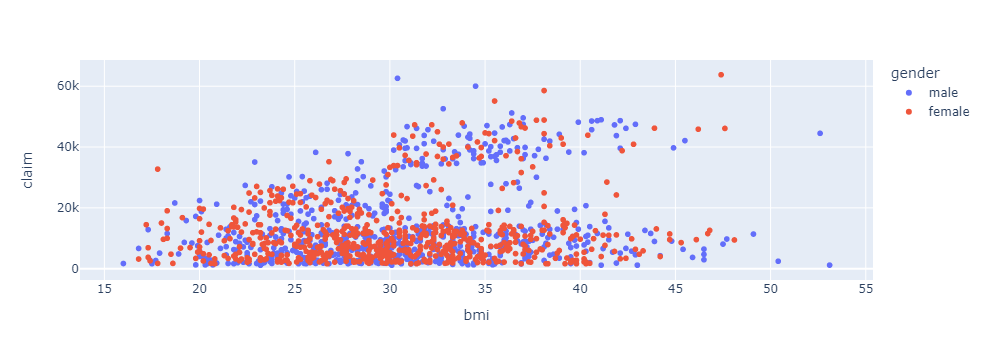

In [50]:
# Scatterplot: bmi vs. claim nach Geschlecht
fig = px.scatter(df, x="bmi", y="claim", color="gender")
fig.show()

Hmmm könnte etwa ein Zusammenhang zwischen hohen Insurance Kosten und Rauchen, einem hohen BMI und hohem Blutdruck bestehen??? Lass uns das mit seaborn Plots näher untersuchen:

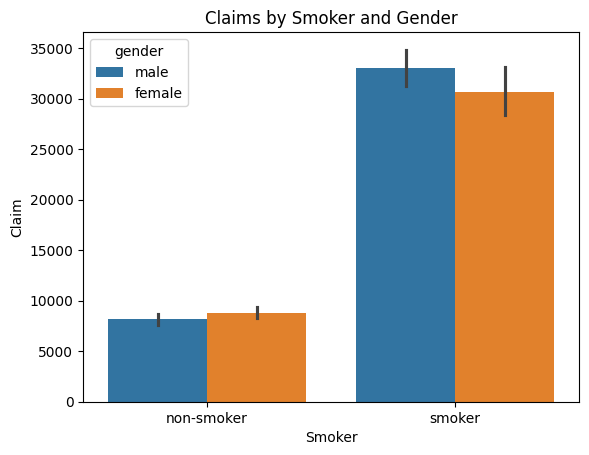

In [55]:
# Create a bar plot to compare claims by smoker status and gender

sns.barplot(x='smoker', hue='gender', y='claim', data=df)
plt.title("Claims by Smoker and Gender")
plt.xlabel("Smoker")
plt.ylabel("Claim")
plt.show()

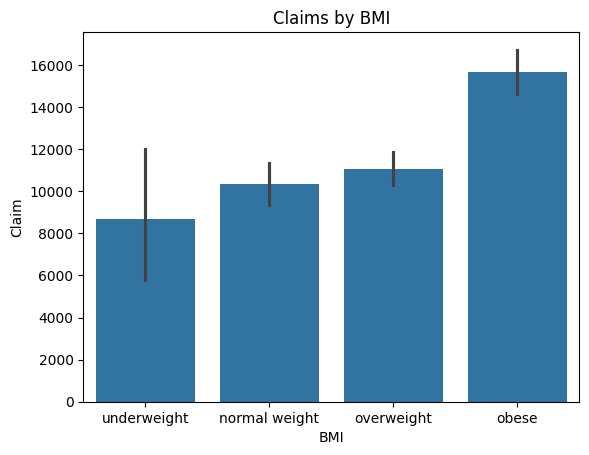

In [56]:
# Create a bar plot to compare claims by BMI

sns.barplot(x='bmi_category', y='claim', data=df)
plt.title("Claims by BMI")
plt.xlabel("BMI")
plt.ylabel("Claim")
plt.show()

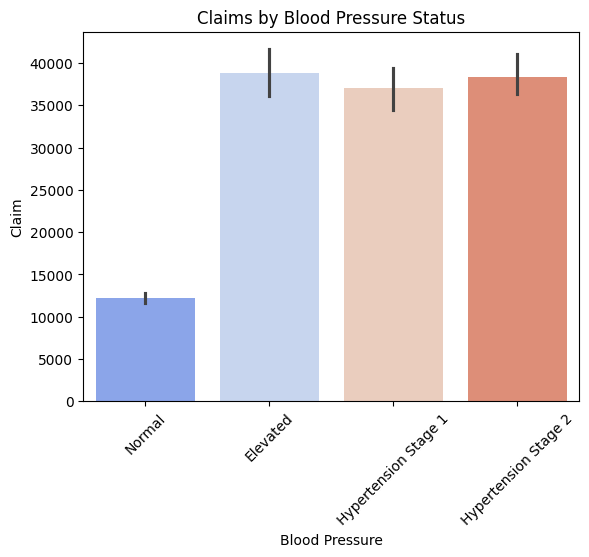

In [57]:
# Claims by Blood Pressure Status

# Define custom colors 
custom_palette = sns.color_palette("coolwarm", n_colors=4)

# Create a bar plot to compare claims by region using the custom palette
sns.barplot(x='bp_category', y='claim', data=df, palette=custom_palette)
plt.title("Claims by Blood Pressure Status")
plt.xlabel("Blood Pressure")
plt.ylabel("Claim")

# Rotate the y-axis label by 45 degrees
plt.xticks(rotation=45)
plt.show()

#### Pie Charts
Zum Abschluss: Keiner mag sie, aber sie machen trotzdem Spaß: Kuchendiagramme - yummy!

Anzahl an claims nach Region
Anzahl an claims nach Geschlecht

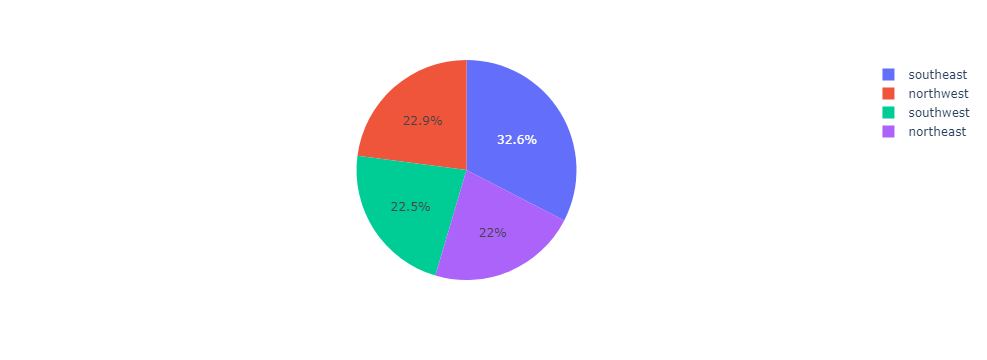

In [58]:
# Piechart: Anzahl an claims nach Region
fig = px.pie(df, values='claim', names='region')
fig.show()

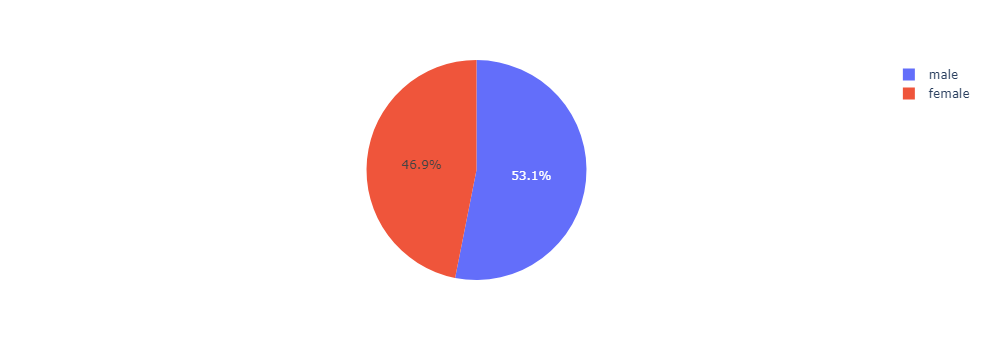

In [59]:
# Piechart: Anzahl an claims nach Geschlecht
fig = px.pie(df, values='claim', names='gender')
fig.show()

### Correlation Matrix

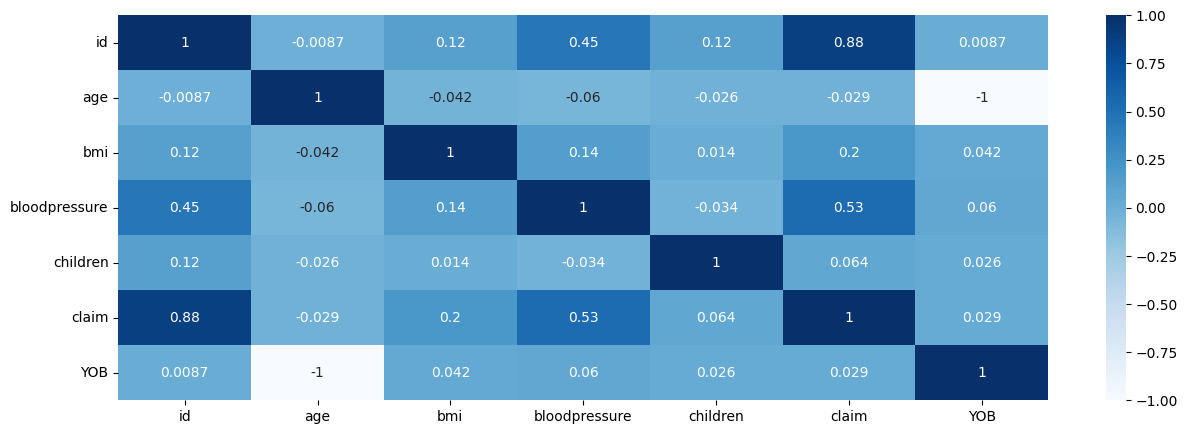

In [61]:
# Correlation between columns

# Select only the numeric columns in the DataFrame
numeric_data = df.select_dtypes(include=['number'])

# Calculate the correlation matrix for the numeric variables
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(15, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="Blues")
#print(correlation_matrix)
plt.show()